In [1]:
#import important libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#reading image and resizing and gray scale conversion
image = cv2.imread('img.jpg',0)
image = cv2.resize(image,(1400,800))

In [3]:
 # Robertsedge operator
kernel_Roberts_x = np.array([
    [1, 0],
    [0, -1]
    ])
kernel_Roberts_y = np.array([
    [0, -1],
    [1, 0]
    ])

average_kernel = (kernel_Roberts_x+kernel_Roberts_y)

In [4]:
output_x = cv2.filter2D(image, -1, kernel_Roberts_x)
output_y = cv2.filter2D(image, -1, kernel_Roberts_y)

Text(0.5, 1.0, 'Robert Y Image')

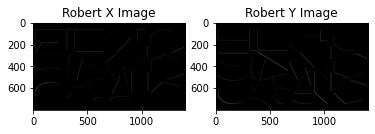

In [5]:
# Show sharpening effect
plt.subplot(121),plt.imshow(output_x,cmap = 'gray')
plt.title('Robert X Image')
plt.subplot(122),plt.imshow(output_y,cmap = 'gray')
plt.title('Robert Y Image')

In [6]:
output_Rav = cv2.filter2D(image, -1, average_kernel)

Text(0.5, 1.0, 'Robert Output Image')

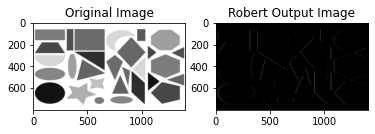

In [7]:
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(output_Rav,cmap = 'gray')
plt.title('Robert Output Image')

In [8]:
# Sobel edge operator
kernel_Sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])
kernel_Sobel_y = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]])

average_kernel = (kernel_Sobel_x+kernel_Sobel_y)/2

In [9]:
output_Sx = cv2.filter2D(image, -1, kernel_Sobel_x)
output_Sy = cv2.filter2D(image, -1, kernel_Sobel_y)

Text(0.5, 1.0, 'Sobel Y Image')

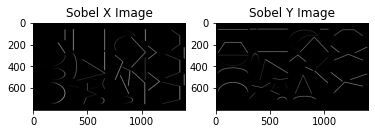

In [10]:
#sobel output image
plt.subplot(121),plt.imshow(output_Sx,cmap = 'gray')
plt.title('Sobel X Image')
plt.subplot(122),plt.imshow(output_Sy,cmap = 'gray')
plt.title('Sobel Y Image')

In [11]:
output_Sav = cv2.filter2D(image, -1, average_kernel)

Text(0.5, 1.0, 'Sobel Output Image')

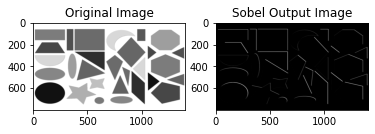

In [12]:
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(output_Sav,cmap = 'gray')
plt.title('Sobel Output Image')

In [13]:
# Prewitt edge operator
kernel_Prewitt_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]])
kernel_Prewitt_y = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]])

average_kernel = kernel_Prewitt_x+kernel_Prewitt_y

In [14]:
output_Px = cv2.filter2D(image, -1, kernel_Prewitt_x)
output_Py = cv2.filter2D(image, -1, kernel_Prewitt_y)

Text(0.5, 1.0, 'Prewitt Y Image')

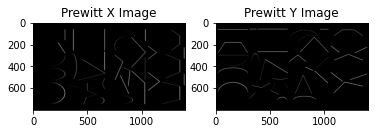

In [15]:
plt.subplot(121),plt.imshow(output_Px,cmap = 'gray')
plt.title('Prewitt X Image')
plt.subplot(122),plt.imshow(output_Py,cmap = 'gray')
plt.title('Prewitt Y Image')

In [16]:
output_Pav = cv2.filter2D(image, -1, average_kernel)

Text(0.5, 1.0, 'Prewitt Output Image')

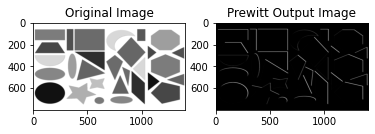

In [17]:
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(output_Pav,cmap = 'gray')
plt.title('Prewitt Output Image')

In [18]:
# Kirsch edge detection operator
def kirsch(image):
    m,n = image.shape
    list=[]
    kirsch = np.zeros((m,n))
    for i in range(2,m-1):
        for j in range(2,n-1):
            d1 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d2 = np.square((-3) * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d3 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d4 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d5 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] - 3
                  * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d6 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d7 = np.square(5 * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d8 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])

                         # : Take the maximum value in each direction, the effect is not good, use another method
            list=[d1, d2, d3, d4, d5, d6, d7, d8]
            kirsch[i,j]= int(np.sqrt(max(list)))
                         # : Rounding the die length in all directions
            #kirsch[i, j] =int(np.sqrt(d1+d2+d3+d4+d5+d6+d7+d8))
    for i in range(m):
        for j in range(n):
            if kirsch[i,j]>127:
                kirsch[i,j]=255
            else:
                kirsch[i,j]=0
    return kirsch


In [19]:
output_K = kirsch(image)

Text(0.5, 1.0, 'Kirsch Image')

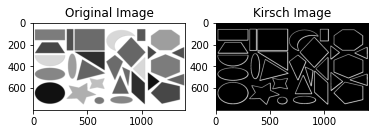

In [20]:
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(output_K,cmap = 'gray')
plt.title('Kirsch Image')

In [21]:
# CannyEdge Detection k is the Gaussian kernel size, t1, t2 is the threshold size
def Canny(image,k,t1,t2):
    img = cv2.GaussianBlur(image, (k, k), 0)
    canny = cv2.Canny(img, t1, t2)
    return canny

In [22]:
output_5 = Canny(image,3,50,150)

Text(0.5, 1.0, 'Canny Image')

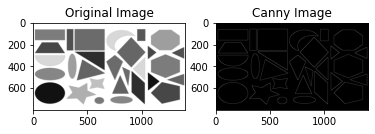

In [23]:
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(output_5,cmap = 'gray')
plt.title('Canny Image')

In [24]:
# 
kernel_Laplacian_1 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]])
kernel_Laplacian_2 = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]])

In [25]:
 # Two convolution kernels do not have rotation invariance
kernel_Laplacian_3 = np.array([
    [2, -1, 2],
    [-1, -4, -1],
    [2, 1, 2]])
kernel_Laplacian_4 = np.array([
    [-1, 2, -1],
    [2, -4, 2],
    [-1, 2, -1]])

kernel_average = (kernel_Laplacian_3+kernel_Laplacian_4+kernel_Laplacian_1+kernel_Laplacian_2)/4

In [26]:
# 5*5 LoG Convolution Template
kernel_LoG = np.array([
                       [0, 0, -1, 0, 0],
                       [0, -1, -2, -1, 0],
                       [-1, -2, 16, -2, -1],
                       [0, -1, -2, -1, 0],
                       [0, 0, -1, 0, 0]])

In [27]:
 # convolution
output_Lav = cv2.filter2D(image, -1, kernel_average)
output_LoG = cv2.filter2D(image, -1, kernel_LoG)

Text(0.5, 1.0, 'Laplacian of gaussian Image')

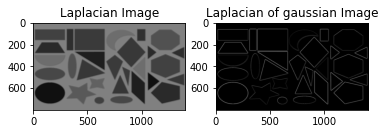

In [28]:
plt.subplot(121),plt.imshow(output_Lav,cmap = 'gray')
plt.title('Laplacian Image')
plt.subplot(122),plt.imshow(output_LoG,cmap = 'gray')
plt.title('Laplacian of gaussian Image')